# Part 1) Loading and preprocessing the data

In [1]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from numpy import reshape, transpose
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## a) Load the dataset

In [2]:
digits = load_digits()

## b) Describe the data

Digits has five keys: description, data, images, target and target_names. The actual data are in both data and images. Below it is shown that digits.data is a 2D-matrix and digits.images is a 3D-matrix. They both have the same dimension 1797 which is the number of records. The actual attribute values are represented in two ways. For digits.data the format is 1 \* 64 and for digits.images it is 8 \* 8.

In [3]:
print("Keys of digits:", dir(digits))
print("digits.data.shape:",digits.data.shape)
print("digits.images.shape:",digits.images.shape)

Keys of digits: ['DESCR', 'data', 'images', 'target', 'target_names']
digits.data.shape: (1797, 64)
digits.images.shape: (1797, 8, 8)


All attributes values are integers between 0 and 16. Value 0 stands for a black pixel and value 16 for a white pixel. Values between those are grayscale values. Below is an example of what the data looks like. There is both the matrix representation and a plot of that.

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


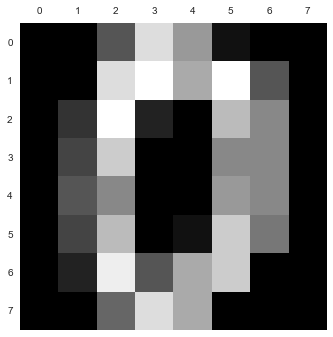

In [4]:
print(digits.images[0])
plt.gray()
plt.rcParams["axes.grid"] = False
plt.matshow(digits.images[0])
plt.show()

## c) Normalization in K-Means
When using K-Means clustering, the data must be in a normalized format and it shouldn't contain outliers. This can be achieved by pre-processing the data before starting the actual learning. In general, the data can have for example attribute A with values from 2000 to 3000 and another attribute B with values from 0.01 to 0.1. Comparing these without any normalization would give strange results because all the values of attribute B are so close to each other compared to values of attribute A. Also outliers of the data shouldn't be considered as part of any cluster so they need to be ignored.

## d) Normalization in this case
For this dataset, there isn't a huge need of normalizing the data, because all of the attributes have the same range of values from 0 to 16.

## e) Normalize data
Sklearn's normalize method is used. That method takes one record at a time and scales it to unit length.

There are two plots below where the distribution of values can be seen. First plot is for original data and second plot is for normalized data.

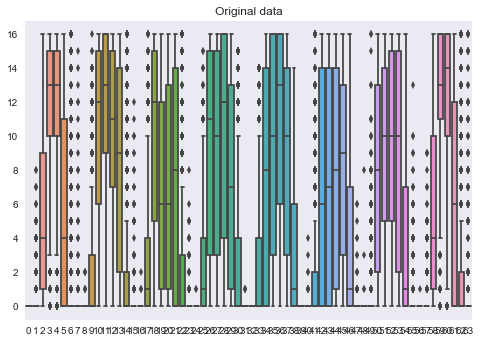

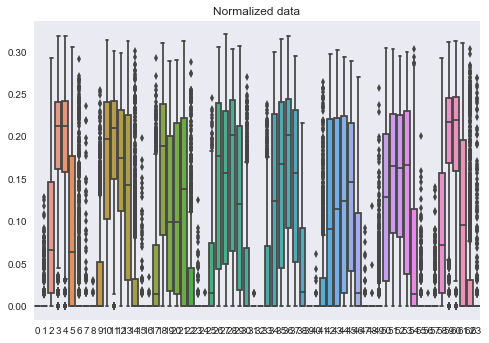

In [5]:
digits_normalized = normalize(digits.data)
sns.boxplot(data=digits.data)
plt.title('Original data')
plt.show()

sns.boxplot(data=digits_normalized)
plt.title('Normalized data')
plt.show()

# Part 2) Clustering

## a) Clustering with 20 different initial cluster center configurations. 
Error is highly dependant on the type of normalization used since different normalization methods scale the attribute values to different ranges. For example, if we calculate the sum of squared distances on attribute values scaled from -1 to 1, we get a different result then if the attributes were scaled to range [0, 1]. That is why we cannot use SSE to compare two clusterings if they use different methods to normalize the data.

In [6]:
kmeans = KMeans(10,n_init=20)
kmeans.fit(digits_normalized)
print(kmeans.inertia_)

297.93037019


## b) Amount of clusters from 1 to 20. 
Error decreases with the number of clusters increasing. However that does not mean that we should always choose the biggest $K$ as with number of clusters increasing, the information value of such experiment decreases (Having $N$ records and $N$ clusters is completely useless). We should select $K$ where the error rate stops decreasing fast.

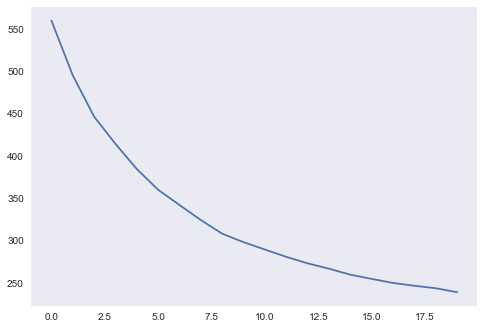

In [7]:
errotable =[]
for i in range (1,21):
    kmeans = KMeans(i,n_init=20)
    kmeans.fit(digits_normalized)
    errotable.append(kmeans.inertia_)
plt.plot(errotable)
plt.show()

# Part 3)

## a) Visualizing

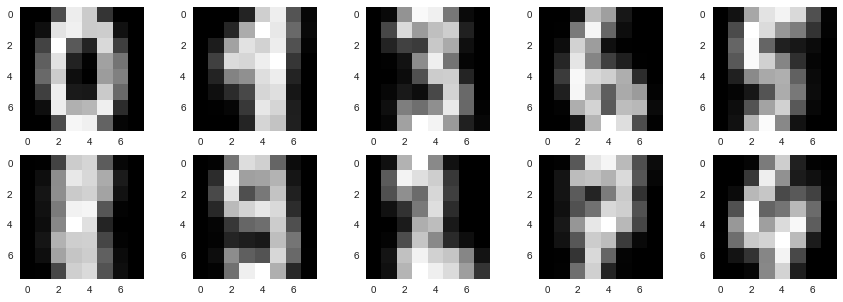

In [8]:
num_clusters = 10
kmeans = KMeans(num_clusters, n_init=20)
kmeans.fit(digits_normalized)
centroids = kmeans.cluster_centers_
grid_x = 5
grid_y = 2
f, ax_arr = plt.subplots(grid_y, grid_x, figsize=(15,5))
for i in range(0,10):
    ax_arr[i // grid_x, i % grid_x].imshow(reshape(centroids[i],(8,8)), 
                                           interpolation="none")
plt.show()

## b) Principal Component Analysis

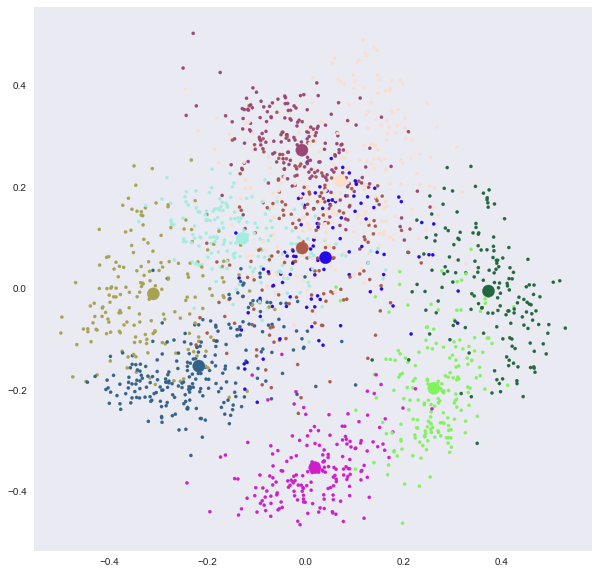

In [9]:
pca = PCA(n_components=2)

# clustering
pca.fit(digits_normalized)
digits_to_plot = pca.transform(digits_normalized)
centroids_to_plot = pca.transform(centroids)

# find out which cluster does each record belong to
labels = kmeans.labels_

# list of colors for each cluster
col_list = np.random.rand(num_clusters, 3)
colors = [[col_list[l][0], col_list[l][1], col_list[l][2]] for l in labels]
colors_labels = [[col_list[i][0], col_list[i][1], col_list[i][2]] 
                 for i in range(num_clusters)]

# draw plot
plt.figure(figsize=(10,10))
plt.scatter(digits_to_plot[:,0], digits_to_plot[:,1], s=10, c=colors, 
            edgecolors="face")
plt.scatter(centroids_to_plot[:,0], centroids_to_plot[:,1], s=150, 
            c=colors_labels)
plt.show()